In [1]:
import pandas as pd 
import time
import matplotlib.pyplot as plt
import datetime

In [2]:
t0 = time.time()
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
print(f'It took {time.time() - t0} secons to load')

It took 0.17238402366638184 secons to load


In [3]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,56873,56943,57019,57144,57160,57242,57364,57492,57534,57612
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,127192,127509,127795,128155,128393,128518,128752,128959,129128,129307
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,118004,118116,118251,118378,118516,118645,118799,118975,119142,119323
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,12363,12409,12456,12497,12545,12581,12614,12641,12641,12712
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,23010,23108,23242,23331,23457,23549,23697,23841,23951,24122


In [4]:
df.shape

(274, 455)

In [5]:
# 
t0 = time.time()
df = df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='Date', value_name='Confirmed')
print(f'It took {time.time() - t0} secons to reshape')

It took 0.02017521858215332 secons to reshape


In [6]:
df.tail(100)

,Province/State,Country/Region,Lat,Long,Date,Confirmed
123474,NaN,Malaysia,4.210484,101.975766,4/16/21,370528
123475,NaN,Maldives,3.202800,73.220700,4/16/21,26021
123476,NaN,Mali,17.570692,-3.996166,4/16/21,12835
123477,NaN,Malta,35.937500,14.375400,4/16/21,29860
123478,NaN,Marshall Islands,7.131500,171.184500,4/16/21,4
...,...,...,...,...,...,...
123569,NaN,Vietnam,14.058324,108.277199,4/16/21,2772
123570,NaN,West Bank and Gaza,31.952200,35.233200,4/16/21,278135
123571,NaN,Yemen,15.552727,48.516388,4/16/21,5715
123572,NaN,Zambia,-13.133897,27.849332,4/16/21,90750


In [7]:
df.shape

(123574, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123574 entries, 0 to 123573
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Province/State  38335 non-null   object 
 1   Country/Region  123574 non-null  object 
 2   Lat             123123 non-null  float64
 3   Long            123123 non-null  float64
 4   Date            123574 non-null  object 
 5   Confirmed       123574 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 5.7+ MB


In [9]:
# Drop Province/State because its not important for this project
df = df.drop(columns='Province/State')

In [10]:
# Rename Country/Region to Contry
df = df.rename(columns={'Country/Region': 'Country'})

In [11]:
# List all contry regions
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [12]:
def get_data_from_country(country):
    return df.loc[df['Country'] == country]

In [13]:
sweden = get_data_from_country('Sweden')

In [14]:
sweden.head()

,Country,Lat,Long,Date,Confirmed
237,Sweden,60.128161,18.643501,1/22/20,0
511,Sweden,60.128161,18.643501,1/23/20,0
785,Sweden,60.128161,18.643501,1/24/20,0
1059,Sweden,60.128161,18.643501,1/25/20,0
1333,Sweden,60.128161,18.643501,1/26/20,0


In [15]:
con = list(sweden['Confirmed'])
date = list(sweden['Date'])

In [16]:
print(con[-1])
print(date[-1])

900138
4/16/21


In [18]:
date_range = [datetime.datetime.strptime(d,"%m/%d/%y").date() for d in date]

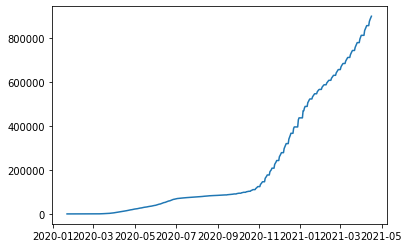

In [27]:
# Use plotly to make better graphs!
plt.plot(date_range, con)